In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
target = iris.target
data = pd.DataFrame(iris.data,columns=iris.feature_names)


data.columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [3]:
import random
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=123)


In [4]:
Example = data.copy()
Example['Label'] = target

In [5]:
X_train['label'] = y_train
train_df = X_train

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
X_test['label'] = y_test
test_df = X_test

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
def check_purity(data):
    
    '''
    looks if there is only one class
    '''
    
    label = data[:,-1]
    #returns array of our unique labels
    unique_classes = np.unique(label)
    
    if len(unique_classes)==1:
        return True
    else:
        return False

In [8]:
check_purity(train_df[train_df['petal_length']>7].values)

False

## Classify

In [9]:
def classify_data(data):
    
    #outputs the majority class of the dataset
    
    label = data[:,-1]
    unique_classes, counts_of_unique_classes = np.unique(label,return_counts=True)

    index = counts_of_unique_classes.argmax()

    classification = unique_classes[index]

    
    
    
    
    return classification




## Potential Splits

In [10]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape

    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]
        values = data[:, column_index]
        univalues = np.unique(values)

        for index in range(len(univalues)):

            if index!=0:
                current_value = univalues[index]

                previous_value = univalues[index-1]

                # find the value between current and previous then divide by 2
                potential_split = (current_value+previous_value)/2

                potential_splits[column_index].append(potential_split)


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    return potential_splits

In [11]:
potential_splits = get_potential_splits(train_df.values)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=train_df,x='petal_width',y='petal_length',
           hue='label',
           fit_reg=False,size=6,aspect=1.5)
plt.vlines(x=potential_splits[3],ymin=0,ymax=7)
plt.title("SHOW POTENTIAL BEST SPLITS")

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'SHOW POTENTIAL BEST SPLITS')

## Split Data

In [13]:
def split_data(data, split_column, split_value):
    
    
    
    split_column_values = data[:, split_column]
    data_below = data[split_column_values <=split_value]
    data_above = data[split_column_values >split_value]
    
    
    
    return data_below, data_above

In [14]:
split_column = 3

split_value = 0.8




In [15]:
data_below, data_above = split_data(Example.values,split_column,split_value)

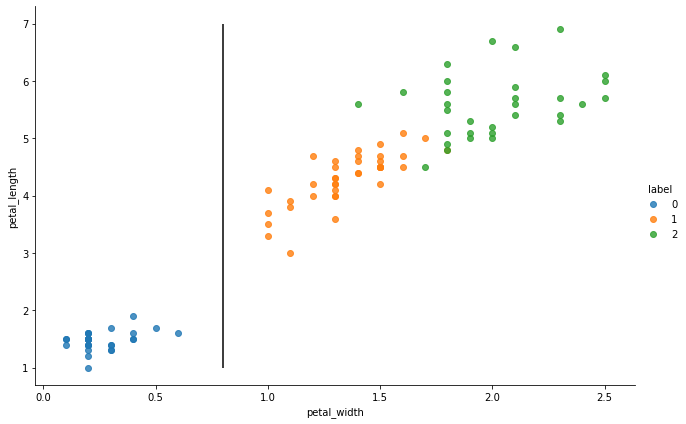

In [16]:
plotting_df = pd.DataFrame(data_below,columns=train_df.columns)


sns.lmplot(data=train_df,x='petal_width',y='petal_length',fit_reg=False,size=6,aspect=1.5,
          hue='label')

plt.vlines(x=split_value,ymin=1,ymax=7)

### Lowest Overall Entropy


In [17]:
def calculate_entropy(data):
    label_column = data[:,-1]
    ##determine probabilities of the classes

    #count up the number of samples in each label
    _,counts = np.unique(label_column,return_counts=True)
    
    #convert the count to the probability of a value falling into a certain class label
    probabilities = counts/counts.sum()

    
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [18]:
def calculate_overall_entropy(data_below,data_above):
    
    
    n_data_points = len(data_below) + len(data_above)


    #samples below the line
    p_data_below = len(data_below)/n_data_points

    #samples above the line
    p_data_above = len(data_above)/n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below)

                      +p_data_above * calculate_entropy(data_above))

    
    
    
    return overall_entropy
    

## Determine the splits that results in the lowest overall entropy

In [19]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 999


    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column=column_index,split_value=value)

            current_overall_entropy = calculate_overall_entropy(data_below,data_above)

            if current_overall_entropy <= overall_entropy:

                overall_entropy=current_overall_entropy


                best_split_column = column_index

                best_split_value = value
    return best_split_column,best_split_value

In [20]:
potential_splits = get_potential_splits(Example.values)

In [21]:
determine_best_split(Example.values,potential_splits)

(3, 0.8)

In [102]:
def determine_type_of_feature(data):
    feature_types = []
    n_unique_values_threshold = 15
    for column in data.columns:
        unique_vals = data[column].unique()
        example_value = unique_vals[0]
        
        if type(example_value) == str or (len(unique_vals)<= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types

In [105]:
feature_types = determine_type_of_feature(train)

i = 0
for column in train.columns:
    print(column, "-", feature_types[i])
    i+=1

Pclass - categorical
Sex - categorical
Age - continuous
SibSp - categorical
Parch - categorical
Fare - continuous
Embarked - categorical


In [104]:
feature_types

['categorical', 'categorical', 'continuous', 'categorical', 'categorical', 'continuous', 'categorical']

## Decision Tree Algorithm

sub_tree = {question: [yes_answer, no_answer]}

## ALGORITHM

In [22]:
def DecisionTreeAlgo(df, counter=0, min_samples=2, max_depth=5):
    
    """
    minimum sample size: the minimum number of sampels a node must contain in
    order to consider splitting.
    """
    
    
    # data preparations
    
    if counter == 0:
        
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        
        data = df.values
    else:
        
        data = df
        
        
    # base case for recusive function
    if (check_purity(data)) or (len(data)< min_samples) or (counter==max_depth):
        #return our prediction
        classification = classify_data(data)
        return classification
    
    
    #recursive section
    
    else:
        
        counter += 1
        
        
        # run helper functions
        
        potential_splits = get_potential_splits(data)
        
        #find lowest overall entropy
        
        split_column, split_value = determine_best_split(data, potential_splits)
        
        
        data_below, data_above = split_data(data, split_column, split_value)
        
        
        #instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question  = "{} <= {}".format(feature_name,split_value)
        
        sub_tree = {question: []}
        
        
        #find answers
        
        yes_answer = DecisionTreeAlgo(data_below, counter, min_samples,max_depth)
        
        
        no_answer = DecisionTreeAlgo(data_above, counter, min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            
        
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        
        return sub_tree
        
    

In [23]:
tree = DecisionTreeAlgo(train_df,min_samples=5,max_depth=3)

## Classify

In [24]:
def predict(example, tree):
    question = list(tree.keys())[0]

    feature_name, comparison, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0] 
    else:
        answer = tree[question][1] 

    #base case    
    if not isinstance(answer, dict):
        return(answer)
    else:

        residual_tree = answer
        return predict(example,residual_tree) 

In [25]:
example = test_df.iloc[2]


In [26]:
predict(example,tree)

2.0

## Accuracy

In [27]:
def calculate_accuracy(df,tree):
    
    df['classification'] = df.apply(predict, axis=1, args=(tree,))
    
    df['classification_correct'] = df.classification == df.label
    
    
    accuracy = df.classification_correct.mean()
    return accuracy
    

In [28]:
calculate_accuracy(test_df,tree)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.94

In [29]:
test_df.loc[133]

sepal_length                6.3
sepal_width                 2.8
petal_length                5.1
petal_width                 1.5
label                         2
classification                1
classification_correct    False
Name: 133, dtype: object

In [30]:
pprint(tree)

Pretty printing has been turned OFF


Text(0.5, 1, 'Petal Leaves')

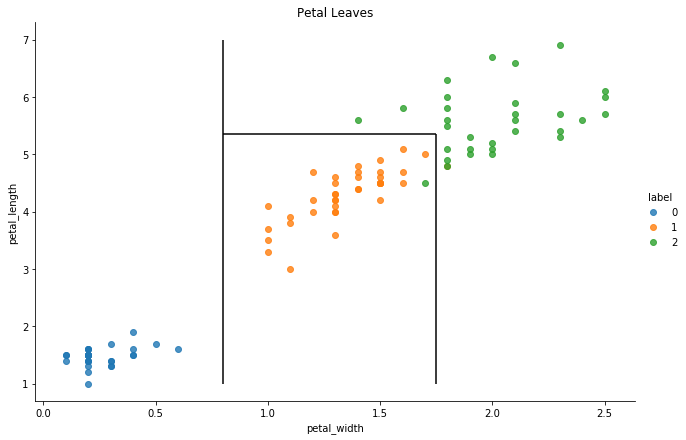

In [31]:
split_column2 = 3
split_value2 = 1.75
split_value = 0.8
split_value3 = 5.35
data_below, data_above = split_data(Example.values,split_column,split_value)
data_belowsplit2, data_abovesplit2 = split_data(Example.values,split_column,split_value)



plotting_df = pd.DataFrame(data_belowsplit2,columns=train_df.columns)

sns.lmplot(data=train_df,x='petal_width',y='petal_length',fit_reg=False,size=6,aspect=1.5,
          hue='label')
plt.vlines(x=split_value2,ymin=1,ymax=split_value3)
plt.vlines(x=split_value,ymin=1,ymax=7)
plt.hlines(y=split_value3,xmin=split_value,xmax=split_value2)

plt.title('Petal Leaves')

In [80]:
train = pd.read_csv('/Users/Matt/Documents/Intro To Stat Learning/data/titanic (1)/train.csv')
test = pd.read_csv('/Users/Matt/Documents/Intro To Stat Learning/data/titanic (1)/test.csv')


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
train = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [82]:
median_Age = train['Age'].median()
mode_Embarked = train['Embarked'].mode()

In [88]:
train = train.fillna({"Age":median_Age,"Embarked":mode_Embarked})

## Decision Tree Algo

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [87]:
train['Embarked'].mode()

0    S
dtype: object